<a href="https://colab.research.google.com/github/Vivek199807/ML-/blob/main/Airline_referral_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name:-** Classification - Airline Passenger Referral Prediction.

Project Type - Classification

Contribution - Individual

# **Problem Statement**

**Business Problem Overview:**



In the highly competitive airline industry, customer loyalty and positive word-of-mouth are crucial drivers of sustained success and revenue growth. Airlines invest heavily in marketing and service enhancements, but one of the most effective ways to acquire new customers is through the recommendations of satisfied passengers. Referrals from trusted sources such as family and friends can significantly influence potential customers' decisions when choosing an airline.

The predictive model's ability to foresee passenger referrals has profound implications for the airline's business strategy. By leveraging data on passenger experiences, such as overall satisfaction, value for money, cabin service, ground service, in-flight entertainment, and seat comfort, the model can pinpoint the specific aspects of service that most strongly influence a passenger's willingness to recommend the airline. For instance, if the model reveals that seat comfort and in-flight entertainment are the most significant factors, the airline can prioritize investments in these areas to boost passenger satisfaction and, consequently, referral rates. This data-driven approach allows the airline to allocate resources more effectively, focusing on the elements that directly impact customer loyalty and brand advocacy.

Furthermore, the insights gained from this predictive model can be used to develop targeted marketing campaigns aimed at passengers who are most likely to become brand advocates. By identifying and nurturing these high-impact customers, airlines can create a loyal customer base that actively promotes the brand to others, amplifying the reach of their marketing efforts. This not only helps in acquiring new customers at a lower cost but also strengthens the airline's competitive edge in the market

# **GitHub Link -**

# ***Let's Begin !***

##Dataset Description

**Feature descriptions briefly as follows:**

**airline:** Name of the airline.

**overall:** Overall point is given to the trip between 1 to 10.

**author:** Author of the trip

**review date:** Date of the Review

**customer review:**Review of the customers in free text format

**aircraft:** Type of the aircraft

**traveller type:** Type of traveler (e.g. business, leisure)

**cabin:** Cabin at the flight date flown: Flight date

**seat comfort:** Rated between 1-5

**cabin service:** Rated between 1-5

**foodbev:** Rated between 1-5

**entertainment:** Rated between 1-5

**ground service:** Rated between 1-5

**value for money:** Rated between 1-5

**recommended:** Binary, target variable.


##**Objective**

**The main objective is to predict whether passengers will refer the airline to their family or friends**.


# **Loading Dataset and Importing Modules**


In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import lightgbm

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Importing all models from sklearn to be used in our model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score,roc_curve, roc_auc_score

##**Reading the Dataset**

In [ ]:
#importing the dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load the dataset from drive
airline_review_df = pd.read_csv('/content/drive/MyDrive/alma/airline_reviews_data.csv')

#**Understand More About The Data**

In [ ]:
airline_review_df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,May-19,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,May-19,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#bottom five rows of data
airline_review_df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


###**Basic information of the dataset**

In [ ]:
#Total number of rows and column of dataset
airline_review_df.shape

(131895, 17)

we have 17 columns and 131895 rows in our data.

In [ ]:
#Column names of the dataset
airline_review_df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [ ]:
#Dataset information
airline_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [ ]:
#Checking the unique values of the recommended column(target variable)
airline_review_df.recommended.unique()

array([nan, 'yes', 'no'], dtype=object)

In [ ]:
#check the unique value
airline_review_df.nunique()

,0
airline,81
overall,10
author,44069
review_date,3015
customer_review,61172
aircraft,2088
traveller_type,4
cabin,4
route,24549
date_flown,63


#**Duplicate values**

In [ ]:
#counting  number of duplicated values
airline_review_df.duplicated().sum()

70711

In [ ]:
#droping the null values
airline_review_df.drop_duplicates(inplace = True)

In [ ]:
airline_review_df.duplicated().sum()

0

# **Null Values**

From the last 5 rows, we can conclude that the dataset contains null values. Let's check the number of null values present for each of the columns of this huge dataset.

In [ ]:
#Checking the null value count for each column
airline_review_df.isnull().sum()

,0
airline,1
overall,1783
author,1
review_date,1
customer_review,1
aircraft,42696
traveller_type,23644
cabin,2479
route,23671
date_flown,23750


In [ ]:
#Overall discription of data
airline_review_df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,59401.0,5.164863,3.483701,1.0,1.0,5.0,9.0,10.0
seat_comfort,56211.0,2.959278,1.436467,1.0,2.0,3.0,4.0,5.0
cabin_service,56240.0,3.200231,1.568429,1.0,2.0,3.0,5.0,5.0
food_bev,48341.0,2.926956,1.483122,1.0,1.0,3.0,4.0,5.0
entertainment,40230.0,2.887994,1.504452,1.0,1.0,3.0,4.0,5.0
ground_service,37169.0,2.681347,1.613995,1.0,1.0,3.0,4.0,5.0
value_for_money,59327.0,2.950849,1.588433,1.0,1.0,3.0,4.0,5.0


#**Exploratory Data Analysis And Visualization**

#**Questions-**

**1.Which Traveller_type has more ratings?**

**2.Which type of Cabin has more recommendation?**

**3.Is it Solo Leisure worth for Money?**

**4.In Economy Class what is the average ratings of Food_bev and entertainment given by passenger?**

**5.Which cabin type has more service ratings?**

**6.Which cabin type has overall service ratings?**

**7.Which travellers_type has overall service ratings?**

**8.Which airline made highest trips?**

**9.Comparison of all independent variable/features?**

###**1) Which Traveller_type has more ratings?**

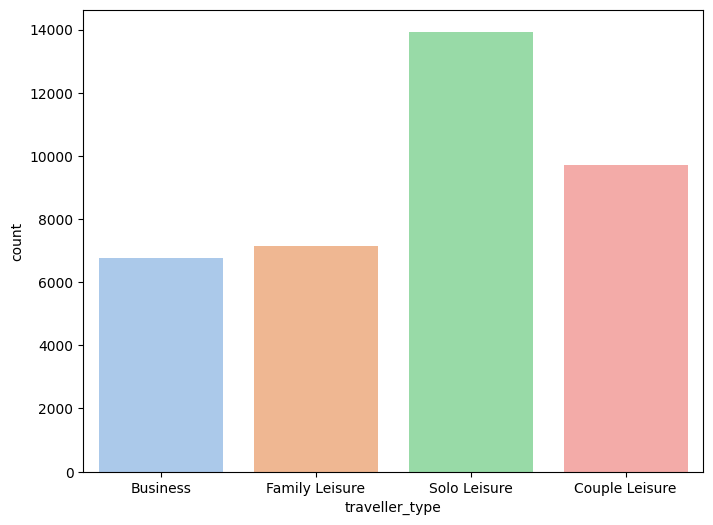

In [ ]:
#setting the figure size and plotting the graph
plt.figure(figsize=(8,6))
sns.countplot(x='traveller_type',data=airline_review_df,hue='traveller_type',palette='pastel',legend=False)
plt.show()



From above plot

* Travelling type of Solo Leisure has more ratings



###**2) Which type of Cabin has more recommendation?**


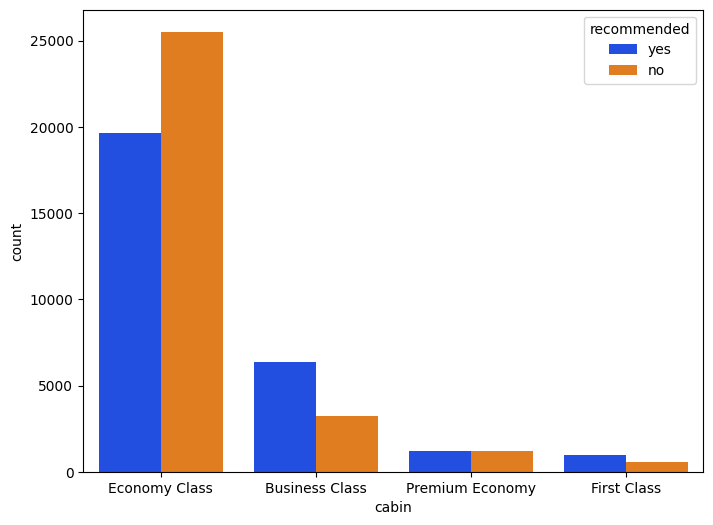

In [ ]:
#setting the figure size and plotting the graph
plt.figure(figsize=(8,6))
sns.countplot(x='cabin',hue='recommended',data=airline_review_df,palette='bright')
plt.show()

On the basis of graph -

* Economy class has highest recommendation with bad reviews.

* Business class has second most recommended cabin type with good reviews.

* premium economy has equal reviews.

* first class is least recommend cabin type with good reviews.

###**3) Is it Solo Leisure worth for Money?**


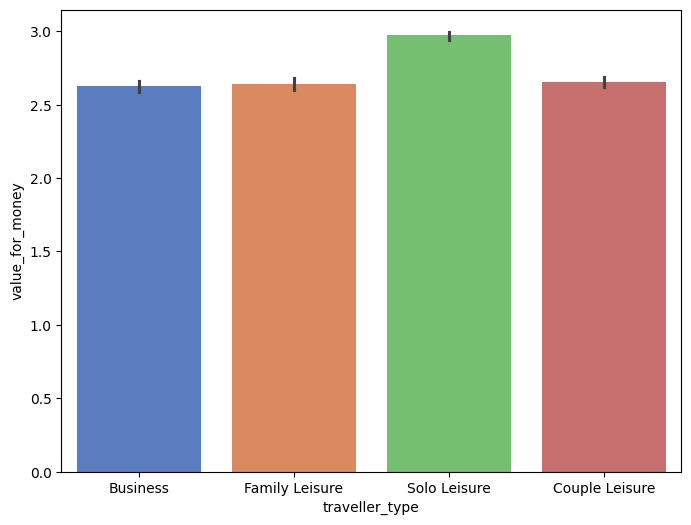

In [ ]:
#setting the figure size and plotting the grap
plt.figure(figsize=(8,6))
sns.barplot(x='traveller_type',y='value_for_money',data=airline_review_df,hue='traveller_type',palette='muted',legend=False)
plt.show()



From above plot

  Yes,Travelling Type of Solo Leisure worth of Money compare to other type of travelling.But the difference is not that much significant.



###**4) In Economy Class what is the average ratings of Food_bev and entertainment given by passenger?**


In [ ]:
#performing the groupby method
eda_4=airline_review_df.groupby('cabin')[['food_bev','entertainment']].mean().reset_index()
eda_4

,cabin,food_bev,entertainment
0,Business Class,3.525108,3.356407
1,Economy Class,2.776919,2.758083
2,First Class,3.384295,3.280827
3,Premium Economy,2.919603,3.038980


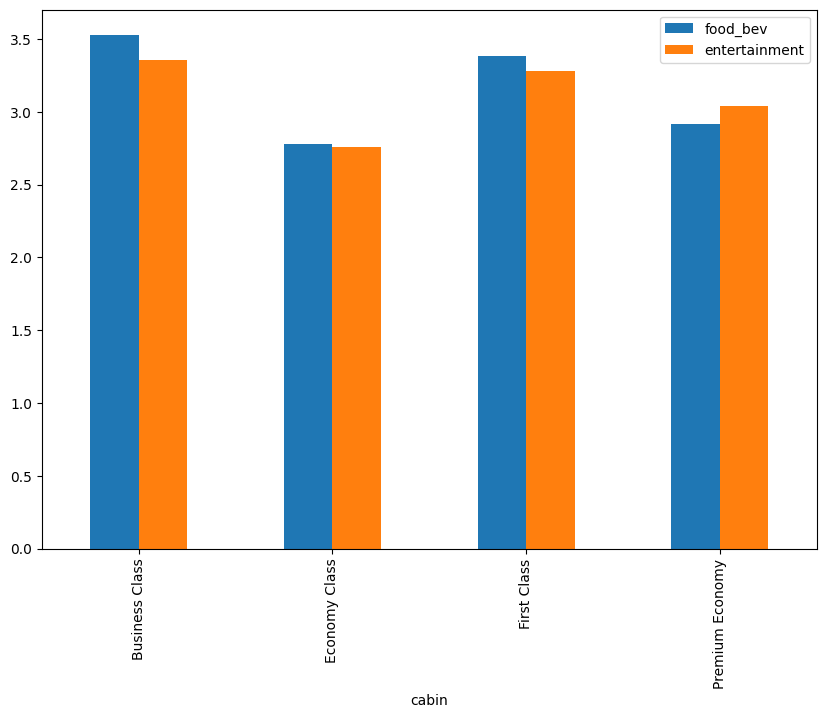

In [ ]:
plt.rcParams['figure.figsize']=(10,7)
eda_4.plot(x="cabin", y=["food_bev", "entertainment"], kind="bar")
plt.show()



From above plot

In Economy Class the average ratings of Food_bev and entertainment given by passenger is lowest compared to other cabin classes.



###**4) Which cabin type has more service ratings?**

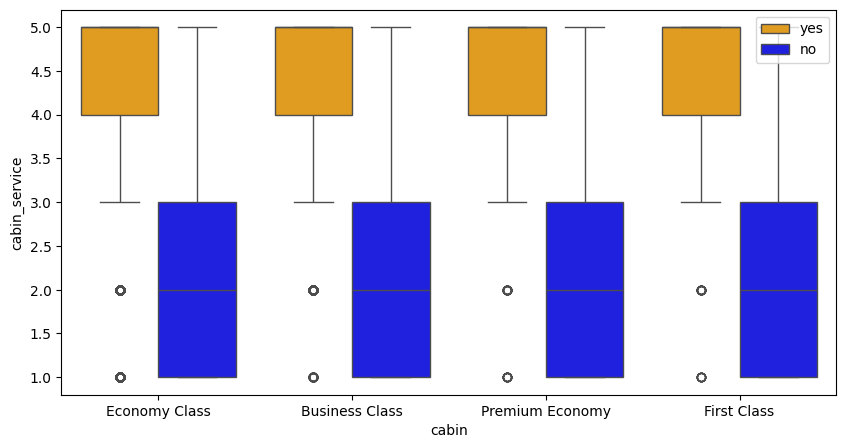

In [ ]:
#Cabin type and cabin service ratings
plt.figure(figsize=(10, 5))
sns.boxplot(x='cabin', y='cabin_service', hue='recommended', data=airline_review_df, palette=['orange', 'blue'])
plt.legend(loc='upper right')
plt.show()



* First class travellers are least likely to recommend the  airlines.

* Recommendation is most probable when the cabin service is given full star rating ie 5 out of 5 here.

* In economy class if we got ratings between 4 to 5 that means airlines recommended.



###**5) Which cabin type has overall service ratings?**

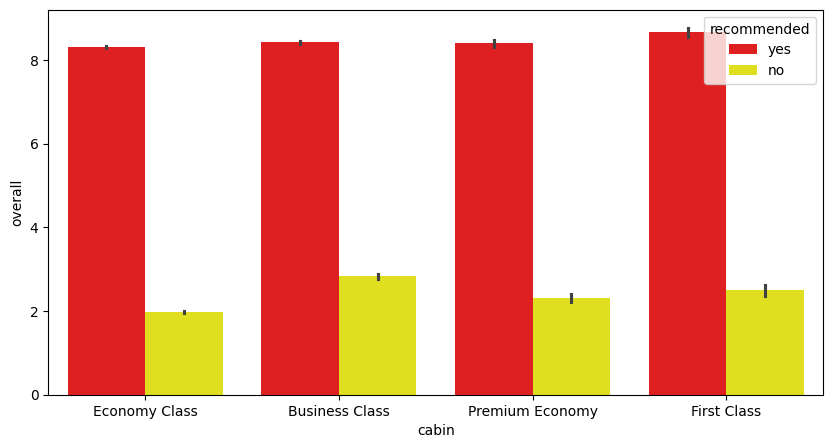

In [ ]:
#Cabin type and overall service ratings (out of 10)
plt.figure(figsize=(10,5))
sns.barplot(x='cabin', y='overall', hue ='recommended',data=airline_review_df, palette= ['red','yellow'])
plt.show()


* If the trip is rated above 8 for overall section, the trip is most likely be recommended by the travellers.
    
* If it is below 3 , the unhappy travellers has not referred the airlines to their friends irrespective of their cabin type.



###**7) Which travellers_type has overall service ratings?**

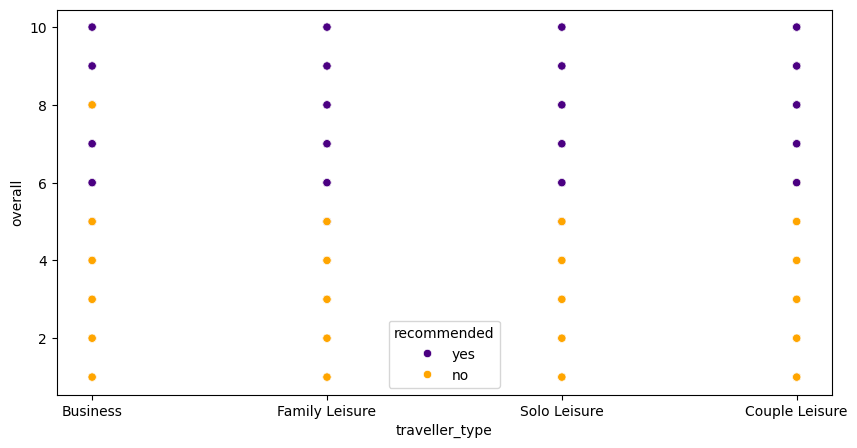

In [ ]:
#Traveller type and overall service ratings (out of 10 )
plt.figure(figsize=(10,5))
sns.scatterplot(x='traveller_type',y='overall', hue ='recommended',data=airline_review_df,palette=['indigo','orange'])
plt.show()

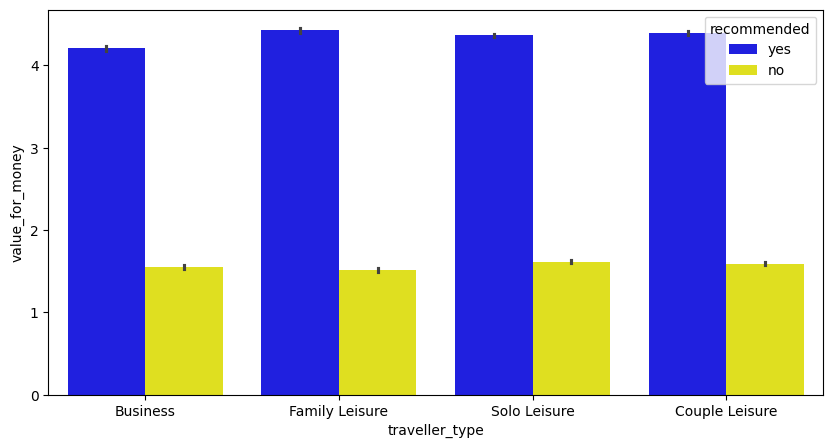

In [ ]:
#Traveller type and value for money ratings (out of 5 )
plt.figure(figsize=(10,5))
sns.barplot(x='traveller_type',y='value_for_money',data=airline_review_df,hue='recommended',palette=['blue','yellow'])
plt.show()



* When the cabin_Service is rated 5, it is highly likely that the reviewer has recommended the airlines to travel irrespective of the type of cabin.

* Economy class is the most recommended cabin type, whereas business class is the least recommended one


##**8)Which airline made highest trips?**

In [ ]:
# Get the number of trips each airline make.
trip_by_airlines = airline_review_df['airline'].value_counts()
trip_by_airlines

,count
airline,
Spirit Airlines,2871
American Airlines,2846
United Airlines,2774
British Airways,2731
Emirates,1763
...,...
QantasLink,104
Adria Airways,85
Air Arabia,80


Getting more visualized view of top 10 airlines trip through graph.

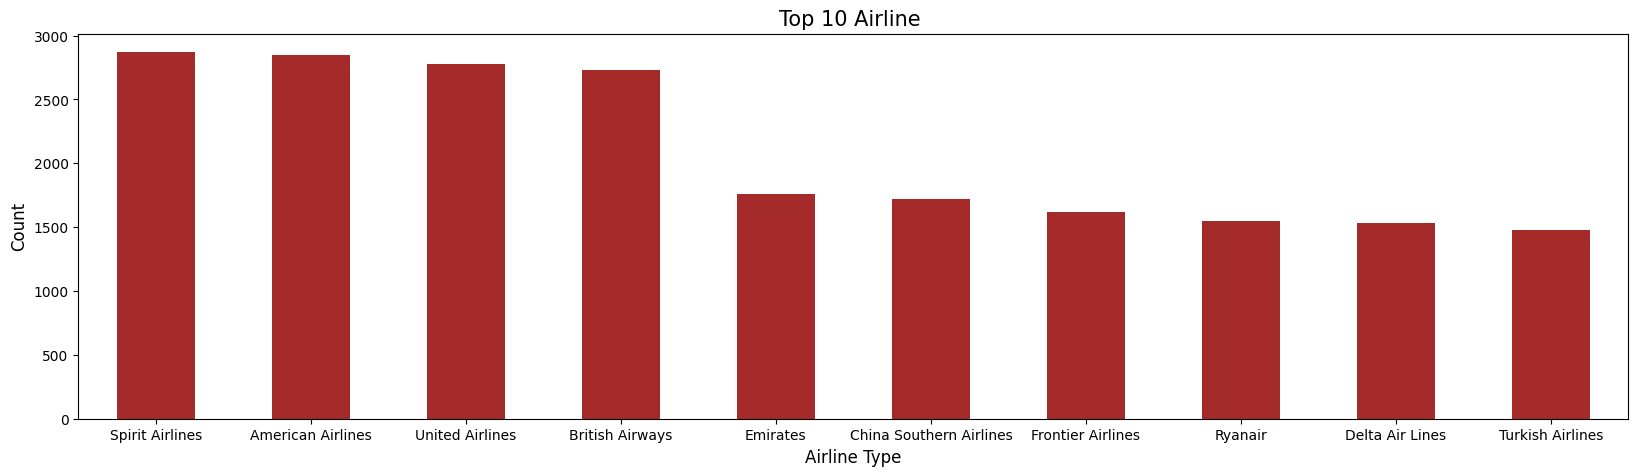

In [ ]:
# Visualize the top 10 airlines with most trips
plt.figure(figsize=(20,5))
trip_by_airlines[:10].plot(kind='bar',color = 'brown')
plt.xlabel('Airline Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Top 10 Airline ',fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

We have observed that the top 10 airlines with most trips are-

* Spirit Airlines  
* American Airlines

* United Airlines

* British Airways

* Emirates

* china southern airline

* frontier airlines

* ryanair

* delta air lines

* turkish airlines

##**9) Comparison of all independent variable/features?**

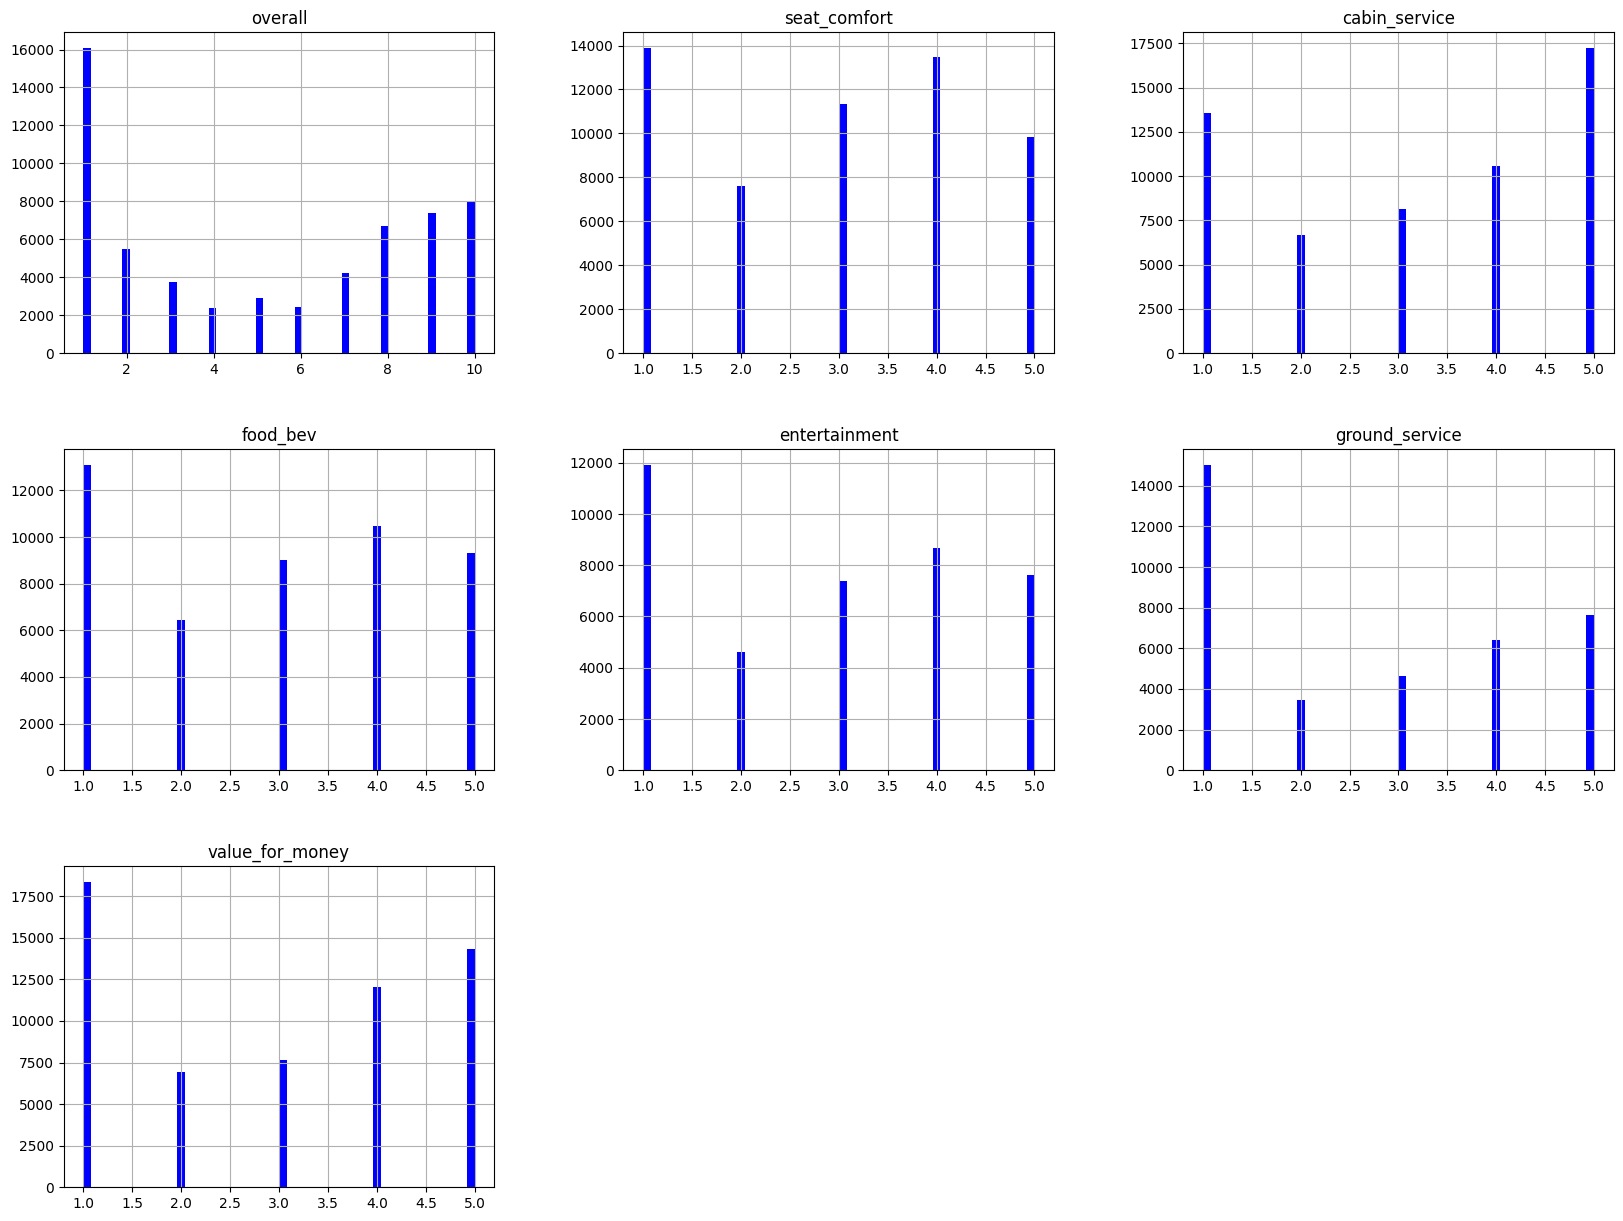

In [ ]:
#frequency distribution using histgram
airline_review_df.hist(bins=50, figsize=(20,15),color = 'blue')
plt.show()

From above plot

* The overall feature ratings of 1 to 2 occur more frequently.
From Seat comfort feature, We can say that rating of 1 is highest and rating of 4 is the second highest.


* From cabin service feature, We can say that rating of 5 is highest and rating of 1 is the second highest.

* The food bev feature ratings of 2,4 and 5 are varies equally.Which means their frequency are approximately equal.

* The features of both the entertainment & ground service, We can say that ratings of 3 is highest and ratings of 1 is the second highest.

* From value for money feature, It clearly shows that most of the passenger gives ratings of 1 as highest. From this we can say that most of the airline does not provide good service to passenger.

#**Droping Unnecessary columns**

In [ ]:
#Checking Percentage wise missing values.
airline_review_df.isnull().sum()

,0
airline,1
overall,1783
author,1
review_date,1
customer_review,1
aircraft,42696
traveller_type,23644
cabin,2479
route,23671
date_flown,23750


In [ ]:
#Showing the unique aircraft names
airline_review_df.aircraft.unique()

array([nan, 'A330', 'Boeing 737-800 / A330-300', ...,
       'Boeing 737-800 and Embraer 190', 'Boeing 737-400/ 737-800',
       'boeing 767'], dtype=object)

In [ ]:
#checking the number of unique aircrafts
airline_review_df.aircraft.nunique()

2088

Droping the aircraft column from data as it have highest null values.

In [ ]:
airline_review_df = airline_review_df.drop(['aircraft'],axis = 1)

In [ ]:
#droping the columns from data which are not for our use
airline_review_df = airline_review_df.drop(['author','review_date','date_flown'],axis = 1)
airline_review_df

,airline,overall,customer_review,traveller_type,cabin,route,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,London to Izmir via Istanbul,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,Istanbul to Bucharest,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,Rome to Prishtina via Istanbul,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,Washington Dulles to Karachi,4.0,5.0,5.0,5.0,5.0,5.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,NaN,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131888,Ukraine International,NaN,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131890,Ukraine International,NaN,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131892,Ukraine International,NaN,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [ ]:
airline_review_df = airline_review_df.drop(['customer_review'],axis = 1)
airline_review_df

,airline,overall,traveller_type,cabin,route,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Business,Economy Class,London to Izmir via Istanbul,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,Istanbul to Bucharest,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,Rome to Prishtina via Istanbul,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,Washington Dulles to Karachi,4.0,5.0,5.0,5.0,5.0,5.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131888,Ukraine International,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131890,Ukraine International,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131892,Ukraine International,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


Reason of droping columns--


* Author - Being the categorical with high Variability not required for prediction.
* Date_flown - Not needed for building a model as it is not a time series data, also some common time period is there between 2 dates.
* Review_date - Similar to Date_flown
* Customer_review - As it is related to overall review feature of the datasets.

On the basis of null values we divide our data in two parts-

* high_null = columns which have high null values.
* low_null = columns which have low null values.

In [ ]:
#Splitting the Numeric column
low_null = ['overall','seat_comfort','cabin_service','value_for_money']
high_null = ['food_bev','entertainment','ground_service']

In [ ]:
#Imputation technique using Quantile-1 value
def impute_by_q1_values(df,column):
  Q1=np.percentile(np.sort(df[column].dropna()),25)
  df[column].fillna(Q1,inplace=True)

In [ ]:
#Looping the null value column
for col in low_null:
  impute_by_q1_values(airline_review_df,col)

Imputed null values by Quantile-1 for the columns have low null value percentage.

In [ ]:
#Imputation technique using Median Imputation
def median_imputation(df,column):
  df[column].fillna(df[column].median(),inplace=True)

In [ ]:
#Looping the null value column
for col in high_null:
  median_imputation(airline_review_df,col)

Imputed null values by Median Imputaion for the columns have high percetage.

In [ ]:
#after imputed null values
airline_review_df

,airline,overall,traveller_type,cabin,route,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,1.0,NaN,NaN,NaN,2.0,2.0,3.0,3.0,3.0,1.0,NaN
1,Turkish Airlines,7.0,Business,Economy Class,London to Izmir via Istanbul,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,Istanbul to Bucharest,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,Rome to Prishtina via Istanbul,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,Washington Dulles to Karachi,4.0,5.0,5.0,5.0,5.0,5.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,1.0,NaN,NaN,NaN,2.0,2.0,3.0,3.0,3.0,1.0,no
131888,Ukraine International,1.0,NaN,NaN,NaN,2.0,2.0,3.0,3.0,3.0,1.0,no
131890,Ukraine International,1.0,NaN,NaN,NaN,2.0,2.0,3.0,3.0,3.0,1.0,no
131892,Ukraine International,1.0,NaN,NaN,NaN,2.0,2.0,3.0,3.0,3.0,1.0,no


Now we are left with null values in **traveller_type , cabin , recommeded** column.

In [ ]:
#Remove recommended null value row
airline_review_df.dropna(subset=['recommended'],inplace=True)

In [ ]:
airline_review_df['traveller_type'].fillna(method="ffill",inplace=True)#forward filling

In [ ]:
airline_review_df['cabin'].fillna(airline_review_df['cabin'].mode().values[0],inplace=True)#filling with most frequent occuring entry and that too the first of most frequently occuring entry (as there are multiple modes over here)

Filling **traveller_type** column with **Mode Imputation**

**cabin** column with **Forward fill method.**

In [ ]:
airline_review_df

,airline,overall,traveller_type,cabin,route,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,London to Izmir via Istanbul,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,Istanbul to Bucharest,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,Rome to Prishtina via Istanbul,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,Washington Dulles to Karachi,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,1.0,Couple Leisure,Economy Class,NaN,2.0,2.0,3.0,3.0,3.0,1.0,no
131888,Ukraine International,1.0,Couple Leisure,Economy Class,NaN,2.0,2.0,3.0,3.0,3.0,1.0,no
131890,Ukraine International,1.0,Couple Leisure,Economy Class,NaN,2.0,2.0,3.0,3.0,3.0,1.0,no
131892,Ukraine International,1.0,Couple Leisure,Economy Class,NaN,2.0,2.0,3.0,3.0,3.0,1.0,no


In [ ]:
#Checking missing values
airline_review_df.isnull().sum()

,0
airline,0
overall,0
traveller_type,0
cabin,0
route,22249
seat_comfort,0
cabin_service,0
food_bev,0
entertainment,0
ground_service,0


Filling **route** column missing values with "unknown".

In [ ]:
airline_review_df['route'].fillna('unknown',inplace=True)
airline_review_df.isnull().sum()

,0
airline,0
overall,0
traveller_type,0
cabin,0
route,0
seat_comfort,0
cabin_service,0
food_bev,0
entertainment,0
ground_service,0


In [ ]:
airline_review_df.shape

(59761, 12)

#**Converting target as categorical data into numerical data: 'Label Encoding'**

In [ ]:
#converting targeted column i.e. "recommended" into a numerical data
airline_review_df['recommended'].replace({'yes':1,'no':0},inplace=True)

In [ ]:
airline_review_df

,airline,overall,traveller_type,cabin,route,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,London to Izmir via Istanbul,4.0,5.0,4.0,4.0,2.0,4.0,1
3,Turkish Airlines,2.0,Family Leisure,Economy Class,Istanbul to Bucharest,4.0,1.0,1.0,1.0,1.0,1.0,0
5,Turkish Airlines,3.0,Business,Economy Class,Rome to Prishtina via Istanbul,1.0,4.0,1.0,3.0,1.0,2.0,0
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,Washington Dulles to Karachi,4.0,5.0,5.0,5.0,5.0,5.0,1
9,Turkish Airlines,1.0,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,1.0,1.0,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,1.0,Couple Leisure,Economy Class,unknown,2.0,2.0,3.0,3.0,3.0,1.0,0
131888,Ukraine International,1.0,Couple Leisure,Economy Class,unknown,2.0,2.0,3.0,3.0,3.0,1.0,0
131890,Ukraine International,1.0,Couple Leisure,Economy Class,unknown,2.0,2.0,3.0,3.0,3.0,1.0,0
131892,Ukraine International,1.0,Couple Leisure,Economy Class,unknown,2.0,2.0,3.0,3.0,3.0,1.0,0


###**Correlation plot**

In [ ]:
cor=airline_review_df[['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money','recommended']].corr()
cor

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
overall,1.000000,0.754887,0.780707,0.687768,0.549421,0.678158,0.890328,0.901433
seat_comfort,0.754887,1.000000,0.704897,0.621915,0.540171,0.570627,0.733793,0.690767
cabin_service,0.780707,0.704897,1.000000,0.664829,0.489910,0.572919,0.734546,0.724936
food_bev,0.687768,0.621915,0.664829,1.000000,0.602852,0.461425,0.642870,0.641039
entertainment,0.549421,0.540171,0.489910,0.602852,1.000000,0.364071,0.513900,0.505561
ground_service,0.678158,0.570627,0.572919,0.461425,0.364071,1.000000,0.648013,0.619942
value_for_money,0.890328,0.733793,0.734546,0.642870,0.513900,0.648013,1.000000,0.839569
recommended,0.901433,0.690767,0.724936,0.641039,0.505561,0.619942,0.839569,1.000000


<Axes: >

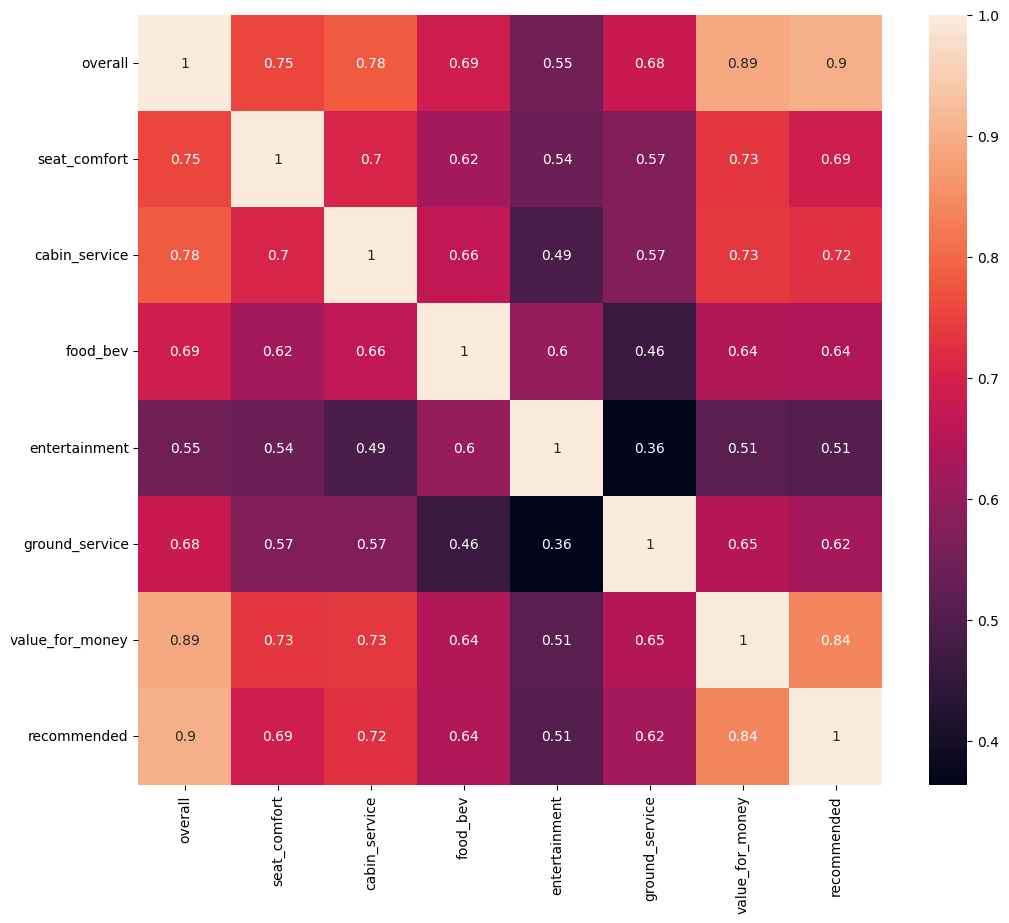

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True)

Drop overall column as it has highest correlation value than others.

In [ ]:
#drop overall column
airline_review_df.drop(["overall"], axis = 1, inplace = True)

In [ ]:
#drop airline column as its of no use
airline_review_df.drop(["airline"], axis = 1, inplace = True)

In [ ]:
#also dropping routes column as again its not a numerical column
airline_review_df.drop(["route"], axis = 1, inplace = True)

#**Defining the dependent and independent variables.**

In [ ]:
#separating the dependent and independent variables
y = airline_review_df['recommended']#dependent or target variable
X = airline_review_df.drop(columns = 'recommended')#this dataframe will contain all the columns apart from the "recommended" column, this will act as independent variable

In [ ]:
X.columns

Index(['traveller_type', 'cabin', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money'],
      dtype='object')

#**One hot encoding**

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X.shape

(59761, 14)

In [ ]:
X

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,traveller_type_Business,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
1,4.0,5.0,4.0,4.0,2.0,4.0,True,False,False,False,False,True,False,False
3,4.0,1.0,1.0,1.0,1.0,1.0,False,False,True,False,False,True,False,False
5,1.0,4.0,1.0,3.0,1.0,2.0,True,False,False,False,False,True,False,False
7,4.0,5.0,5.0,5.0,5.0,5.0,False,False,False,True,False,True,False,False
9,1.0,1.0,1.0,1.0,1.0,1.0,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,2.0,2.0,3.0,3.0,3.0,1.0,False,True,False,False,False,True,False,False
131888,2.0,2.0,3.0,3.0,3.0,1.0,False,True,False,False,False,True,False,False
131890,2.0,2.0,3.0,3.0,3.0,1.0,False,True,False,False,False,True,False,False
131892,2.0,2.0,3.0,3.0,3.0,1.0,False,True,False,False,False,True,False,False


In [ ]:
print("The Percentage of No labels of Target Variable is",np.round(y.value_counts()[0]/len(y)*100))
print("The Percentage of Yes labels of Target Variable is",np.round(y.value_counts()[1]/len(y)*100))


The Percentage of No labels of Target Variable is 52.0
The Percentage of Yes labels of Target Variable is 48.0


The percentage of both labels are approximately equal. So, no need of Handling Class Imbalance technique.

#**Splitting Train and Test Data**

In [ ]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 42)

In [ ]:
#shape of x_train and x_test data
print(X_train.shape)
print(X_test.shape)

(47808, 14)
(11953, 14)


In [ ]:
#shape of y_train and y_test data
print(y_train.shape)
print(y_test.shape)

(47808,)
(11953,)


#**Model-1:Fitting Logistic Regression**

In [ ]:
#logistic regression fitting
logistic = LogisticRegression(fit_intercept=True, max_iter=10000,  solver='saga',penalty='elasticnet',C=1.0,class_weight='balanced',tol=1e-4,random_state=42,multi_class='multinomial',verbose=1,n_jobs=-1,l1_ratio=0.5)
logistic.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 399 epochs took 16 seconds


LogisticRegression(class_weight='balanced', l1_ratio=0.5, max_iter=10000,
                   multi_class='multinomial', n_jobs=-1, penalty='elasticnet',
                   random_state=42, solver='saga', verbose=1)

In [ ]:
logistic.coef_

array([[ 0.14762637,  0.27523636,  0.21687252,  0.12551967,  0.36090126,
         0.8167638 ,  0.06364553, -0.04038336, -0.09308295,  0.01836389,
         0.05600399, -0.05207875,  0.03566284, -0.11043225]])

In [ ]:
logistic.intercept_

array([-5.84503216])

In [ ]:
logistic.score(X_test,y_test)

0.9322345854597173

In [ ]:
y_pred = logistic.predict(X_test)

In [ ]:
#report of logistic regression i.e. all the metrics of logistic regression together
report_lR = classification_report(y_test, y_pred)
print(report_lR)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      6225
           1       0.92      0.94      0.93      5728

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953



**93%** accuracy with **Logistic Regression**

<Axes: >

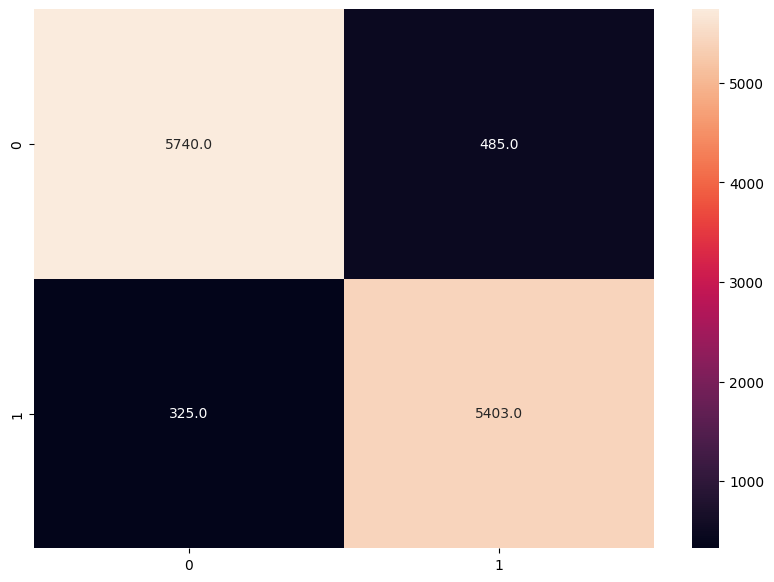

In [ ]:
#cofusion matrix of logistic regression
confuse_matrix_lr = confusion_matrix( y_test,y_pred)
#plooting confusion matrix
sns.heatmap(confuse_matrix_lr, annot=True, fmt = ".1f")

#Implementing Cross-validated Logistic Regression

In [ ]:
logistic_reg = LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(logistic, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 418 epochs took 14 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 429 epochs took 15 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 418 epochs took 13 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 397 epochs took 15 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 384 epochs took 12 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 332 epochs took 10 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 270 epochs took 12 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 393 epochs took 24 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 439 epochs took 20 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 411 epochs took 13 seconds
Cross-Validation Accuracy Scores [0.93997072 0.94478143 0.93871575 0.9405982  0.93829743 0.93474169
 0.94122569 0.9405982  0.93158996 0.9376569 ]


In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.9315899581589958, 0.9388175956256417, 0.9447814264798159)

#**Model-2:Fitting Decision Tree Classifer**

In [ ]:
#Initializing Decision Tree Model object
tree_classify=DecisionTreeClassifier()
#Taining a model with x and y
tree_classify.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
print("Training Accuracy of Decision Tree Model is",tree_classify.score(X_train,y_train))
print("Testing Accuracy of Decision Tree Model is",tree_classify.score(X_test,y_test))

Training Accuracy of Decision Tree Model is 0.9745440093708166
Testing Accuracy of Decision Tree Model is 0.9160880113778967


In [ ]:
y_pred = tree_classify.predict(X_test)

In [ ]:
#report of decision tree i.e. all the metrics of logistic regression together
report_decision_tree = classification_report(y_test, y_pred)
print(report_decision_tree)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6225
           1       0.92      0.91      0.91      5728

    accuracy                           0.92     11953
   macro avg       0.92      0.92      0.92     11953
weighted avg       0.92      0.92      0.92     11953



Here our model is Overfitted. So Hyperparameter tuning is done to prune a Decision tree to preserve Generalized Model.

#Hyperparameter Tuning For Decision Tree

In [ ]:
#setting the parameters and scoring metric
parameters = {"criterion":["gini","entropy"],"max_depth":[5,7],"min_samples_split":[5,7],"min_samples_leaf":[2,3]}
scoring_=['f1','recall','precision','accuracy']

In [ ]:
#performing hyperparameter tuning using gridsearchcv

#setting an estimator,and crossvalidation
dec_tree_cv = GridSearchCV(estimator=tree_classify, param_grid=parameters, scoring=scoring_, cv=5,refit='accuracy')

#Fitting x and y to gridsearchcv model using an estimator Decision tree classifier
dec_tree_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 7]},
             refit='accuracy',
             scoring=['f1', 'recall', 'precision', 'accuracy'])

In [ ]:
#calling an best params
dec_tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 7}

In [ ]:
#calling an best score
dec_tree_cv.best_score_

0.9371652744349568

**93%** accuracy of **Decision Tree** with the help of hypermatring tunning.

#**Model-3:Fitting Random Forest**

In [ ]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
random_forest_model.score(X_test,y_test)

0.9296410942859533

In [ ]:
#report of decision tree
report_ran_forest_model = classification_report(y_test, y_pred)
print(report_ran_forest_model)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6225
           1       0.92      0.91      0.91      5728

    accuracy                           0.92     11953
   macro avg       0.92      0.92      0.92     11953
weighted avg       0.92      0.92      0.92     11953



**92%** accuracy with **Random Forest**

#Implementing Cross-validated Random Forest

In [ ]:
random_forest_gridcv = GridSearchCV(estimator=random_forest_model,
                       param_grid = parameters,
                       cv = 5, verbose=2)

In [ ]:
random_forest_gridcv.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.9s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.2s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.2s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.2s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.2s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.2s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.2s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.1s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.2s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 7]},
             verbose=2)

In [ ]:
random_forest_gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

#**Model-4:K-Nearest Neighbour**

In [ ]:
k_near_neighbor = KNeighborsClassifier()
k_near_neighbor.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = k_near_neighbor.predict(X_test)

In [ ]:
# Compute accuracy on the training set
train_accuracy = k_near_neighbor.score(X_train, y_train)
print(train_accuracy)
# Compute accuracy on the test set
test_accuracy = k_near_neighbor.score(X_test, y_test)
print(test_accuracy)

0.9493390227576974
0.9293901112691375


**~93%** accuracy with **K-Nearest-Neighbor**

In [ ]:
#cofusion matrix of k_neighbor
confuse_matrix_k_near_neighbor  = confusion_matrix(y_test,y_pred)
confuse_matrix_k_near_neighbor

array([[5815,  410],
       [ 434, 5294]])

In [ ]:
# Area under ROC curve
roc_auc_score(y_test,y_pred)

0.9291841948800791

#**Model-5:Support Vector Machine**

In [ ]:
support_vector = SVC(kernel='linear',C=0.1,class_weight='balanced',probability=True,tol=1e-4,max_iter=10000,random_state=42,verbose=True)
support_vector.fit(X_train, y_train)

[LibSVM]

SVC(C=0.1, class_weight='balanced', kernel='linear', max_iter=10000,
    probability=True, random_state=42, tol=0.0001, verbose=True)

In [ ]:
#score for support vector machine
support_vector.score(X_test, y_test)

0.9293901112691375

**~93%** accuracy with **support vector machine**

In [ ]:
y_pred = support_vector.predict(X_test)

In [ ]:
#confusion matrix
support_vector_con_mat = confusion_matrix( y_test,y_pred)
support_vector_con_mat

array([[5704,  521],
       [ 323, 5405]])

#**Model-6:Naïve Bayes Classifier**

In [ ]:
#Implimanting naive bayes model
naive_bayes_class = GaussianNB()
naive_bayes_class.fit(X_train, y_train)

GaussianNB()

In [ ]:
#score for naive bayes
naive_bayes_class.score(X_train,y_train)

0.9177543507362784

**~92%** accuracy with **naive bayes classifier**

In [ ]:
# making predictions on the testing set
y_pred = naive_bayes_class.predict(X_test)

In [ ]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 91.0901029030369


###**Accuracy Metrics for All Fitted Model**

In [ ]:
#Creating a function to return all Models Accuracy Score

def accuracy_of_each_model(model,X_train,X_test):

  #predicting a train datas
  y_train_preds=model.predict(X_train)

  #predicting a test datas
  y_test_preds=model.predict(X_test)

  #storing all training scores
  train_scores=[]

  #storing all test scores
  test_scores=[]
  metrics=['Accuracy_Score','Precsion_Score','Recall_Score','Roc_Auc_Score']

  # Get the accuracy scores
  train_accuracy_score = accuracy_score(y_train,y_train_preds)
  test_accuracy_score = accuracy_score(y_test,y_test_preds)

  train_scores.append(train_accuracy_score)
  test_scores.append(test_accuracy_score)

  # Get the precision scores
  train_precision_score = precision_score(y_train,y_train_preds)
  test_precision_score = precision_score(y_test,y_test_preds)

  train_scores.append(train_precision_score)
  test_scores.append(test_precision_score)

  # Get the recall scores
  train_recall_score =recall_score(y_train,y_train_preds)
  test_recall_score =recall_score(y_test,y_test_preds)

  train_scores.append(train_recall_score)
  test_scores.append(test_recall_score)

  # Get the roc_auc scores
  train_roc_auc_score=roc_auc_score(y_train,y_train_preds)
  test_roc_auc_score =roc_auc_score(y_test,y_test_preds)

  train_scores.append(train_roc_auc_score)
  test_scores.append(test_roc_auc_score)

  return train_scores,test_scores,metrics



In [ ]:
models=[logistic,tree_classify,random_forest_model,k_near_neighbor,support_vector,naive_bayes_class]
name=['Logistic Regression Model','Decision Tree Model After Hyperparameter Tuning','Random Forest Model After Cross Validation','k_neighbor','support vector','naive bayes']

In [ ]:
for model_ in range(len(models)):
  train_score_,test_score_,metrics_=accuracy_of_each_model(models[model_],X_train,X_test)
  print("-#-#-"*3+f"{name[model_]}"+"-@-@-"*4)
  print("")
  print(pd.DataFrame(data={'Metrics':metrics_,'Train_Score':train_score_,'Test_Score':test_score_}))
  print("")

-#-#--#-#--#-#-Logistic Regression Model-@-@--@-@--@-@--@-@-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.938922    0.932235
1  Precsion_Score     0.925293    0.917629
2    Recall_Score     0.948298    0.943261
3   Roc_Auc_Score     0.939349    0.932675

-#-#--#-#--#-#-Decision Tree Model After Hyperparameter Tuning-@-@--@-@--@-@--@-@-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.974544    0.916088
1  Precsion_Score     0.977952    0.916593
2    Recall_Score     0.968373    0.907472
3   Roc_Auc_Score     0.974263    0.915744

-#-#--#-#--#-#-Random Forest Model After Cross Validation-@-@--@-@--@-@--@-@-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.974544    0.929641
1  Precsion_Score     0.970686    0.926812
2    Recall_Score     0.976016    0.926327
3   Roc_Auc_Score     0.974611    0.929509

-#-#--#-#--#-#-k_neighbor-@-@--@-@--@-@--@-@-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.949339    0.9


###**Conclusion**

  The Models used for this Classsification problem are

 1. Logistic Regression Model
 2. Decision Tree Model
 3. Random Forest Model
 4. K-Nearest Neighbor Model
 5.Support Vector Machine Model
 6.Naive Bayes

* I performed Hyperparameter tuning using Gridsearch CV method for Decision Tree Model as well as in Random Forest Model and other three models namely K-Nearest Neighbor ,Support Vector Machine and Naive Bayes model were aloowed to run without any hyperparameter tuning. To increase accuracy and avoid Overfitting Criteria, this is done few steps like Hyperparameter tuning as well as Cross Validation is done. After that, I
finalized the Gradient Boosting model by fine-tuning the hyperparameters.

* Based on the knowledge of the business and the problem usecase. The Classification metrics of Recall is given __first priority__ , Accuray is given __second priority__ , and ROC AUC is given __third priority__.

* I have built classifier models using 6 different types of classifiers and all these are able to give accuracy of more than 90%.So it can be concluded that LogisticRegression gives the best model.

* In model evaluation metrics comparison, it can be noticed that Support Vector Machine being the model with highest accuracy rate by a very small margin, works best among the experimented models for the given dataset.


**Key Insights:**



1. The most critical factors influencing
whether a passenger will recommend an airline to their friends are the overall rating and value for money. These features significantly contribute to the predictive power of the model.

2. The developed classifier models can effectively predict passenger referrals, enabling airlines to identify key passengers who can drive revenue growth through their recommendations.

**Recommendations:**

*  To enhance business growth, the client
must focus on delivering exceptional cabin service, ground service, food and beverage options, in-flight entertainment, and seat comfort. Prioritizing these areas will not only improve passenger satisfaction but also increase the likelihood of positive referrals, ultimately driving higher revenue and customer loyalty.